# Exploring Testing Data from Algebra 1 Test Scores for the 2018-2019 STAAR Test 

In [148]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

## Crime Data Context
16 years of public crime reports from the Austin police department. This dataset contains a record of incidents that the Austin Police Department responded to and wrote a report.

Content
This is a public data set from data.texas.gov and is updated on a weekly basis on the data.texas.gov website. 

Downloaded from https://www.kaggle.com/tsaustin/austin-crime-dataset-16-years-of-data

In [149]:
crime = pd.read_csv('rows3.csv', low_memory=False)

In [150]:
crime['Report Date'] =  pd.to_datetime(crime['Report Date'])

In [151]:
crime['year'] = pd.DatetimeIndex(crime['Report Date']).year

In [152]:
#Dataframe of crimes comitted in year 2018
crime_2018 = crime[crime.year == 2018]

In [153]:
crime_2018.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,year
14,20182741878,POSS OF DRUG PARAPHERNALIA,1818,N,10/01/2018 11:51:00 PM,10/01/2018,2351.0,10/01/2018 11:51:00 PM,2018-10-01,2351.0,...,N,10/07/2018,NaN,NaN,3112827.0,3112827.0,30.398291,-97.744022,"(30.39829057, -97.74402237)",2018
28,20182220769,PUBLIC INTOXICATION,2300,N,08/10/2018 12:14:00 PM,08/10/2018,1214.0,08/10/2018 12:14:00 PM,2018-08-10,1214.0,...,C,08/10/2018,NaN,NaN,3119686.0,3119686.0,30.241188,-97.726508,"(30.24118778, -97.72650789)",2018
33,20182771566,VIOL STATE LAW - OTHER,3399,N,10/04/2018 07:38:00 PM,10/04/2018,1938.0,10/04/2018 07:38:00 PM,2018-10-04,1938.0,...,C,10/09/2018,NaN,NaN,3115951.0,3115951.0,30.267976,-97.737619,"(30.26797616, -97.737619)",2018
36,20182771360,THEFT BY SHOPLIFTING,607,N,10/04/2018 05:25:00 PM,10/04/2018,1725.0,10/04/2018 06:47:00 PM,2018-10-04,1847.0,...,N,10/09/2018,23C,Theft,3134750.0,3134750.0,30.411693,-97.674095,"(30.41169317, -97.67409488)",2018
44,20182781941,DWI .15 BAC OR ABOVE,2111,N,10/05/2018 09:50:00 PM,10/05/2018,2150.0,10/05/2018 09:50:00 PM,2018-10-05,2150.0,...,C,10/05/2018,NaN,NaN,3065328.0,3065328.0,30.182399,-97.900173,"(30.18239928, -97.90017325)",2018


In [154]:
crime_2018.shape

(102657, 28)

## Testing Data Context
Algebra 1 STAAR aggregate data for 2018-2019 school year 

Downloaded from https://tea.texas.gov/student-assessment/testing/staar/staar-aggregate-data-for-2018-2019

In [155]:
alg1 = pd.read_csv('cfy19ea1.dat')

In [156]:
alg1.head()

,year,course,region,district,dname,campus,cname,a1_all_docs_n,a1_all_abs_n,a1_all_oth_n,...,a1_vocy_avg_cat5,a1_vocy_pct_cat5,a1_vocn_avg_cat5,a1_vocn_pct_cat5,a1_voc1_avg_cat5,a1_voc1_pct_cat5,a1_voc2_avg_cat5,a1_voc2_pct_cat5,a1_vocv_avg_cat5,a1_vocv_pct_cat5
0,19,A1,7,1902,CAYUGA ISD,1902001,CAYUGA H.S.,47,0,0,...,4.4,73.0,NaN,NaN,4.8,80.0,4.2,70.0,NaN,
1,19,A1,7,1903,ELKHART ISD,1903001,ELKHART H.S.,71,0,0,...,5.0,84.0,4.7,78.0,5.1,85.0,4.9,81.0,NaN,
2,19,A1,7,1903,ELKHART ISD,1903041,ELKHART M.S.,14,0,0,...,5.6,93.0,4.6,76.0,5.6,93.0,NaN,NaN,NaN,
3,19,A1,7,1904,FRANKSTON ISD,1904001,FRANKSTON H.S.,33,0,0,...,3.6,60.0,5.1,85.0,NaN,NaN,3.7,61.0,NaN,
4,19,A1,7,1904,FRANKSTON ISD,1904041,FRANKSTON M.S.,27,0,0,...,4.8,80.0,5.4,90.0,4.8,80.0,NaN,NaN,NaN,


In [157]:
# clean the campus codes from the testing data to match codes from shapefile by taking the last three digits and cleaning off leading 0s
alg1['clean_codes'] = alg1.campus.astype(str).str[-3:].str.lstrip('0')

In [158]:
# filtering test scores to just have Austin ISD scores 
austin_isd = alg1[alg1['dname'] == 'AUSTIN ISD']

## Shape file context 

Downloaded high school locations from https://www.austinisd.org/planning-asset-management/school-maps-gis 

GIS data for Austin schools 

In [159]:
#reading in a shapefile that contains coordinates (coordinates are in Texas State Plane coordinate system) of all schools
def read_shapefile(shp_path):

    import shapefile

    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records =[list(i) for i in sf.records()]

    shps = [s.points for s in sf.shapes()]

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

shape_file = read_shapefile('/Users/treygaidry/Downloads/1516_Schools/1516_Schools.shp')

In [160]:
# first 5 rows of the shapefile 
shape_file.head()

,OBJECTID,NAME,FULLNAME,SCHL_CODE,GRD_RANGE,ADDRESS,CITY,CAPACITY,PERM_CLRM,PORT_CLRM,...,HIGH_,WEBSITE,PHONE,DISTRICT,CODE,ZIP,STRT_GRD,END_GRD,NAME_SHORT,coords
0,1,Langford Elementary,Langford Elementary,168,EE-5,2206 Blue Meadow Dr,Austin,692,0,0,...,0,,,Austin ISD,168,78744,0,5,Langford,"[[3108504.6599960476, 10039339.30998972]]"
1,2,Lee Elementary,Lee Elementary,121,0-6,3308 Hampton Rd,Austin,418,0,0,...,0,,,Austin ISD,121,78705,0,6,Lee,"[[3118958.8700587153, 10080072.610084638]]"
2,3,Linder Elementary,Linder Elementary,160,1-5,2800 Metcalfe Rd,Austin,588,0,0,...,0,,,Austin ISD,160,78741,1,5,Linder,"[[3116298.9101555496, 10054931.379855394]]"
3,4,Maplewood Elementary,Maplewood Elementary,122,PK-6,3808 Maplewood Ave,Austin,355,0,0,...,0,,,Austin ISD,122,78722,0,6,Maplewood,"[[3123062.8598822206, 10080092.849873558]]"
4,5,Mathews Elementary,Mathews Elementary,123,PK-6,906 West Lynn St,Austin,397,0,0,...,0,,,Austin ISD,123,78703,0,6,Mathews,"[[3108512.4299936295, 10074354.59002465]]"


In [161]:
#changing coordinates data type for easier cleaning
shape_file['coords'] = shape_file['coords'].astype(str)

In [162]:
# splitting the latitude and longitude into two seperate columns
shape_file[['lat', 'lon']] = shape_file['coords'].str.strip('[]').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'}) 

In [163]:
#changing lat and long back to float 
shape_file[['lat', 'lon']] = shape_file[['lat', 'lon']].astype(float)

In [164]:
# changing the coordinate from Texas State Plane to standard latitude and longitude
import pyproj
from pyproj import Proj, transform

inProj = Proj(init='epsg:2277', preserve_units = True)
outProj = Proj(init='epsg:4326')


lat_list = shape_file.lat.to_list()
lon_list = shape_file.lon.to_list()

xx, yy = pyproj.transform(inProj, outProj, lat_list, lon_list)


In [165]:
# adding the standard latitude and longitude to as columns
shape_file['clean_lons'] = np.array(xx)
shape_file['clean_lats'] = np.array(yy)

In [166]:
shape_file.head()

,OBJECTID,NAME,FULLNAME,SCHL_CODE,GRD_RANGE,ADDRESS,CITY,CAPACITY,PERM_CLRM,PORT_CLRM,...,CODE,ZIP,STRT_GRD,END_GRD,NAME_SHORT,coords,lat,lon,clean_lons,clean_lats
0,1,Langford Elementary,Langford Elementary,168,EE-5,2206 Blue Meadow Dr,Austin,692,0,0,...,168,78744,0,5,Langford,"[[3108504.6599960476, 10039339.30998972]]",3.108505e+06,1.003934e+07,-97.763494,30.182084
1,2,Lee Elementary,Lee Elementary,121,0-6,3308 Hampton Rd,Austin,418,0,0,...,121,78705,0,6,Lee,"[[3118958.8700587153, 10080072.610084638]]",3.118959e+06,1.008007e+07,-97.727398,30.293385
2,3,Linder Elementary,Linder Elementary,160,1-5,2800 Metcalfe Rd,Austin,588,0,0,...,160,78741,1,5,Linder,"[[3116298.9101555496, 10054931.379855394]]",3.116299e+06,1.005493e+07,-97.737682,30.224447
3,4,Maplewood Elementary,Maplewood Elementary,122,PK-6,3808 Maplewood Ave,Austin,355,0,0,...,122,78722,0,6,Maplewood,"[[3123062.8598822206, 10080092.849873558]]",3.123063e+06,1.008009e+07,-97.714396,30.293176
4,5,Mathews Elementary,Mathews Elementary,123,PK-6,906 West Lynn St,Austin,397,0,0,...,123,78703,0,6,Mathews,"[[3108512.4299936295, 10074354.59002465]]",3.108512e+06,1.007435e+07,-97.760907,30.278336


In [167]:
# filtering data to only include schools that go up to 12th grade 
shape_hs = shape_file[shape_file['END_GRD'] == 12]

In [168]:
shape_hs.head()

,OBJECTID,NAME,FULLNAME,SCHL_CODE,GRD_RANGE,ADDRESS,CITY,CAPACITY,PERM_CLRM,PORT_CLRM,...,CODE,ZIP,STRT_GRD,END_GRD,NAME_SHORT,coords,lat,lon,clean_lons,clean_lats
77,78,Garza High School,Garza High School,15,11-12,1600 Chicon St,Austin,321,0,0,...,15,78702,9,12,Garza,"[[3121112.749937296, 10074321.999866724]]",3.121113e+06,1.007432e+07,-97.721003,30.277439
78,79,Akins High School,Akins High School,17,9-12,10701 S 1st St,Austin,2394,0,0,...,17,78748,9,12,Akins,"[[3096953.8901186287, 10027069.849948645]]",3.096954e+06,1.002707e+07,-97.800925,30.149086
79,80,Anderson High School,Anderson High School,9,9-12,8403 Mesa Dr,Austin,2373,0,0,...,9,78759,9,12,Anderson,"[[3110128.4799111336, 10109795.40989089]]",3.110128e+06,1.010980e+07,-97.753185,30.375655
80,81,Bowie High School,Bowie High School,13,9-12,4103 W Slaughter Ln,Austin,2463,0,0,...,13,78749,9,12,Bowie,"[[3078366.230115548, 10040413.469914898]]",3.078366e+06,1.004041e+07,-97.858779,30.186916
81,82,Crockett High School,Crockett High School,8,9-12,5601 Manchaca Rd,Austin,2163,0,0,...,8,78745,9,12,Crockett,"[[3097667.229899302, 10050672.539947897]]",3.097667e+06,1.005067e+07,-97.796967,30.213922


In [169]:
# merging the austin isd test scores dataframe and the shapefile data frame using school codes
coords_merge = austin_isd.merge(shape_file, left_on='clean_codes', right_on='CODE', how='outer')

In [170]:
#first 5 rows of merged dataframe 
coords_merge.head()

,year,course,region,district,dname,campus,cname,a1_all_docs_n,a1_all_abs_n,a1_all_oth_n,...,CODE,ZIP,STRT_GRD,END_GRD,NAME_SHORT,coords,lat,lon,clean_lons,clean_lats
0,19.0,A1,13.0,227901.0,AUSTIN ISD,227901002.0,AUSTIN H.S.,376.0,33.0,5.0,...,2,78703,9,12,Austin,"[[3106579.3498703092, 10072663.80994165]]",3.106579e+06,1.007266e+07,-97.767153,30.273811
1,19.0,A1,13.0,227901.0,AUSTIN ISD,227901004.0,LANIER H.S.,369.0,8.0,10.0,...,4,78758,9,12,Lanier,"[[3124423.2698910534, 10104591.879943639]]",3.124423e+06,1.010459e+07,-97.708255,30.360432
2,19.0,A1,13.0,227901.0,AUSTIN ISD,227901005.0,MCCALLUM H.S.,263.0,8.0,0.0,...,5,78756,9,12,McCallum,"[[3117772.799924299, 10091837.519953728]]",3.117773e+06,1.009184e+07,-97.730283,30.325802
3,19.0,A1,13.0,227901.0,AUSTIN ISD,227901006.0,REAGAN H.S.,217.0,3.0,10.0,...,6,78752,9,12,Reagan,"[[3130125.5498250574, 10091525.860143974]]",3.130126e+06,1.009153e+07,-97.691164,30.324144
4,19.0,A1,13.0,227901.0,AUSTIN ISD,227901007.0,TRAVIS H.S.,272.0,10.0,2.0,...,7,78704,9,12,Travis,"[[3114141.040127471, 10058268.429939806]]",3.114141e+06,1.005827e+07,-97.744267,30.233758


### Plotting all crimes committed in Austin in 2018 and Austin high school test scores. 
Crimes are plotted as red dots (102,657 crimes shown). Blue-Green points are average algebra 1 STAAR test scores for high schools with scores progressing from blue (lower scores) to green (higher scores). Blue line is Colorado River. 

/Users/treygaidry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/treygaidry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


<Figure size 432x288 with 0 Axes>

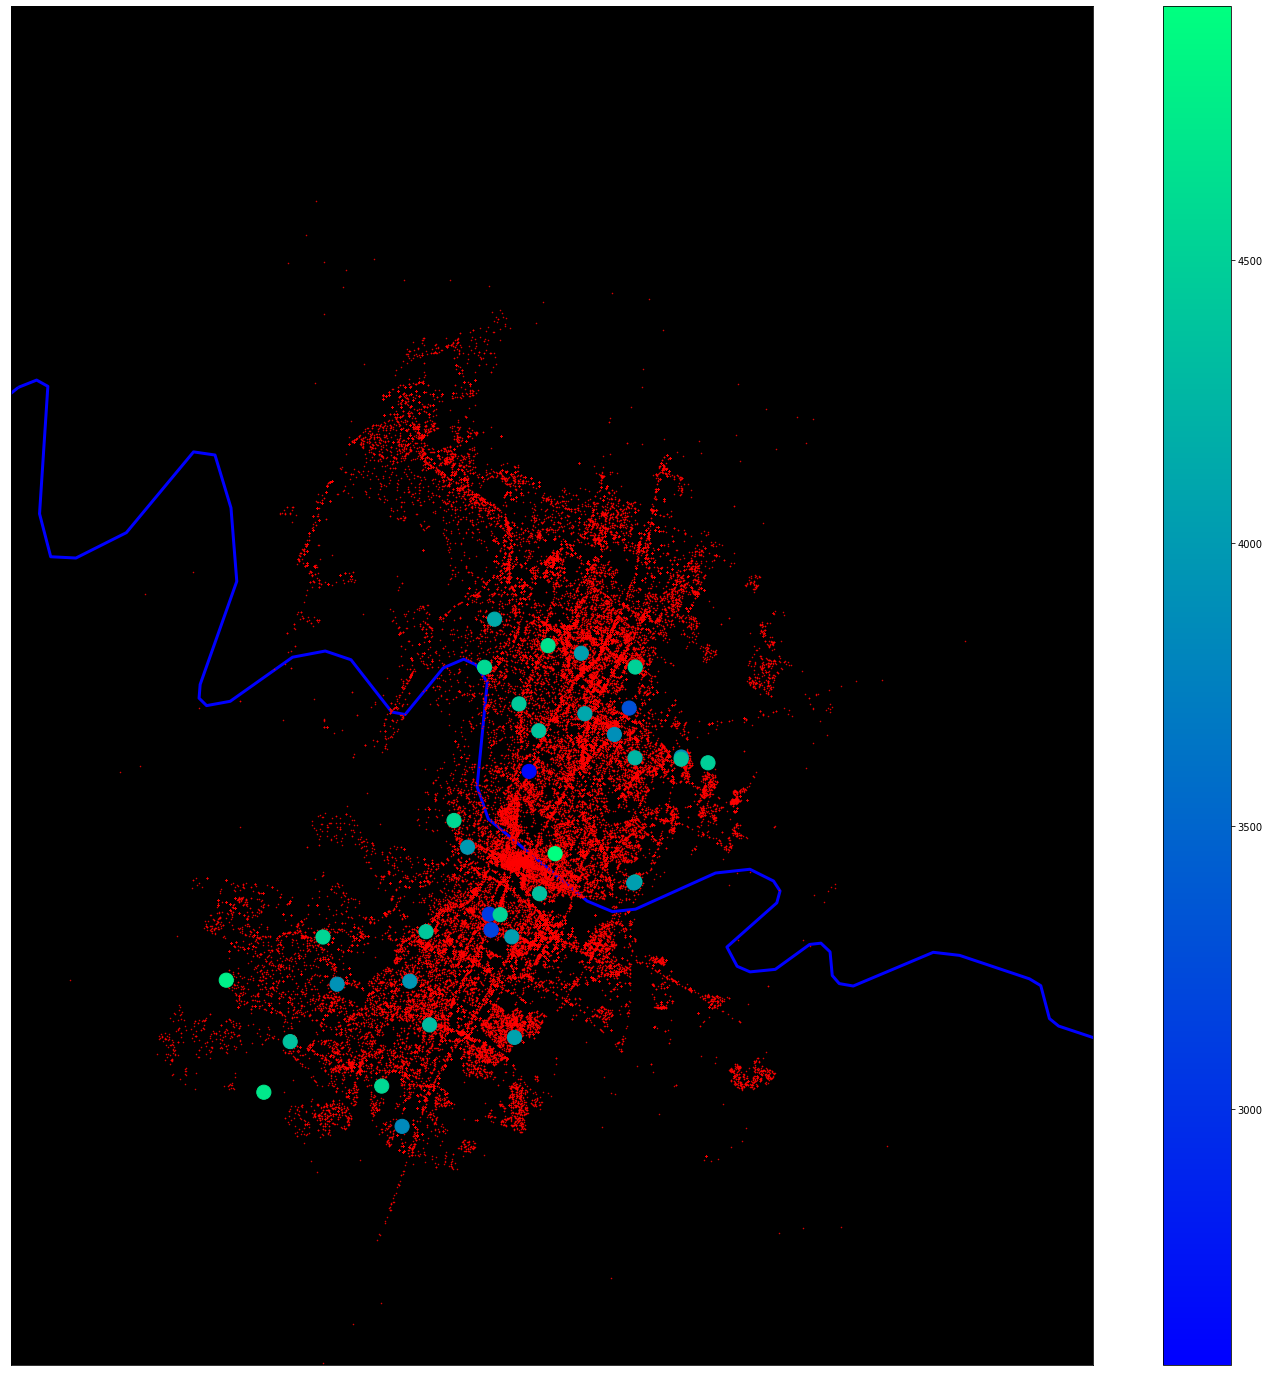

In [171]:
 #import basemap
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
import matplotlib as mpl
import os
from inspect import cleandoc as dedent

plt.figure()

fig, ax = plt.subplots(1, 1, sharex='all', sharey='all', figsize=(25,25))

m  = Basemap(projection='ortho',lon_0=-97.7431,lat_0=30.2672,resolution='h',
             llcrnrx=-1000*25,llcrnry=-1000*25,
             urcrnrx=+1150*25,urcrnry=+1700*25)

m.drawrivers(linewidth=3, color='blue')
m.fillcontinents(color='black', lake_color='blue')

longitudes = crime_2018["Longitude"].tolist()
latitudes = crime_2018["Latitude"].tolist()
m.scatter(longitudes, latitudes, s=1, zorder=2, latlon=True, marker = '.', c='red')

# adding second layer of school test scores to map 
long_clean = coords_merge["clean_lons"].tolist()
lat_clean = coords_merge["clean_lats"].tolist()
m.scatter(long_clean, lat_clean, s=200, zorder=2, latlon=True, c=coords_merge["a1_all_rs"], cmap="winter")

plt.colorbar()
plt.show()

There doesn't seem to be a strong correlation between crime density and test scores, but the lowest test scores seem to be on the southwest and northwest outlying schools. I think there are a couple possible reasons for this. 

1) As Austin is raising property tax, more affluent and students and schools are in the higher populated areas now that show the highest test scores (Downtown, South Congress, and up towards the Domain) 

2) More Spanish speaking communities and students are located Southeast and Northeast Areas. 

In [172]:
# PDF of Latino--Hispanic Populations in Austin 
# If PDF doesnt render copy and paste url 
# https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/latinos_2010_core_per.pdfS
from IPython.display import IFrame
IFrame("https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/latinos_2010_core_per.pdf", width=1500, height=1200)

This map shows high percentages of spanish speaking households in the same areas of Austin that showed lower test scores. So far it looks like native language/ethnicity is a much bigger factor in test scores as opposed to crime rates in areas. 

## Finding Correlations 
Exploring correlations to algebra 1 test scores

In [173]:
correlations = alg1.corr()
correlations = correlations.a1_all_rs
sorted_corr = correlations.sort_values(ascending=False)
sorted_corr.head(30)

a1_bil5_avg_cat5      1.000000
a1_bil5_rs            1.000000
a1_bil5_mastrgl_nm    1.000000
a1_bil5_mastrgl_rm    1.000000
a1_bil5_meetsgl_nm    1.000000
a1_bil5_pct_cat4      1.000000
a1_bil5_avg_cat4      1.000000
a1_bil5_pct_cat5      1.000000
a1_bil5_meetsgl_rm    1.000000
a1_all_rs             1.000000
a1_bil5_pct_cat3      1.000000
a1_bil5_avg_cat3      1.000000
a1_bil5_avg_cat2      1.000000
a1_bil5_pct_cat2      1.000000
a1_bil5_pct_cat1      1.000000
a1_bil5_avg_cat1      1.000000
a1_biln_rs            0.999885
a1_mign_rs            0.999852
a1_esln_rs            0.996960
a1_esbin_rs           0.996887
a1_ti16_rs            0.996560
a1_spen_rs            0.996348
a1_ti18_avg_cat4      0.996157
a1_lep0_rs            0.995345
a1_ti18_pct_cat4      0.994056
a1_gifn_rs            0.992422
a1_ti18_avg_cat5      0.991011
a1_ti18_pct_cat5      0.987878
a1_sexm_rs            0.987556
a1_ti1n_rs            0.987028
Name: a1_all_rs, dtype: float64

The top correlations for Alg1 test scores (excluding % correct correlations):

1) Dual Language Immersion Students (a1_bil5_rs) 

2) Not billingual student (a1-biln_d -99%-) 

3) Not migrant student (a1_mign_rs -99%-) 

4) Not ESL Student (a1_esln_rs 99%)


([<matplotlib.axis.YTick at 0x14a23fc50>,
 <a list of 4 Text yticklabel objects>)

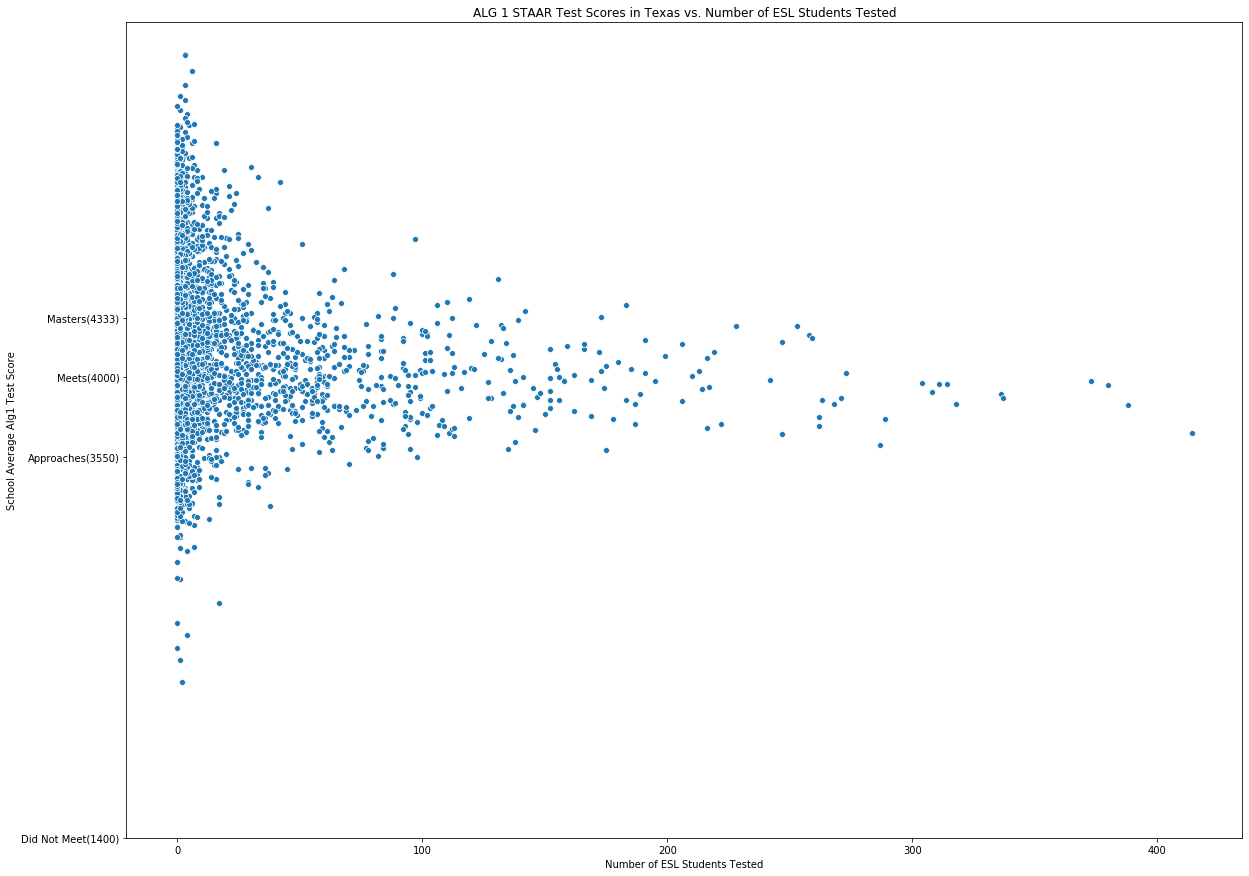

In [174]:
# Graph of test scores vs number of ESL students tested
# ESL = English as Second Language
# Score Conversion Table Listed Below 
plt.figure(figsize=(20,15))
sns.scatterplot(x = alg1.a1_esly_d, y = alg1.a1_all_rs )
plt.title('ALG 1 STAAR Test Scores in Texas vs. Number of ESL Students Tested')
plt.xlabel('Number of ESL Students Tested')
plt.ylabel('School Average Alg1 Test Score')
plt.yticks([1400, 3550, 4000, 4333], labels = ['Did Not Meet(1400)', 'Approaches(3550)', 'Meets(4000)', 'Masters(4333)'])

Graph above (data from all alg1 scores across Texas) shows as the number of ESL students at a school tested rises, the average score of the school trends more towards 4000. 

## Exploring racial differences in alg1 scores 

Text(0.5, 1.0, 'Test Scores vs. Race Correlation Barplot')

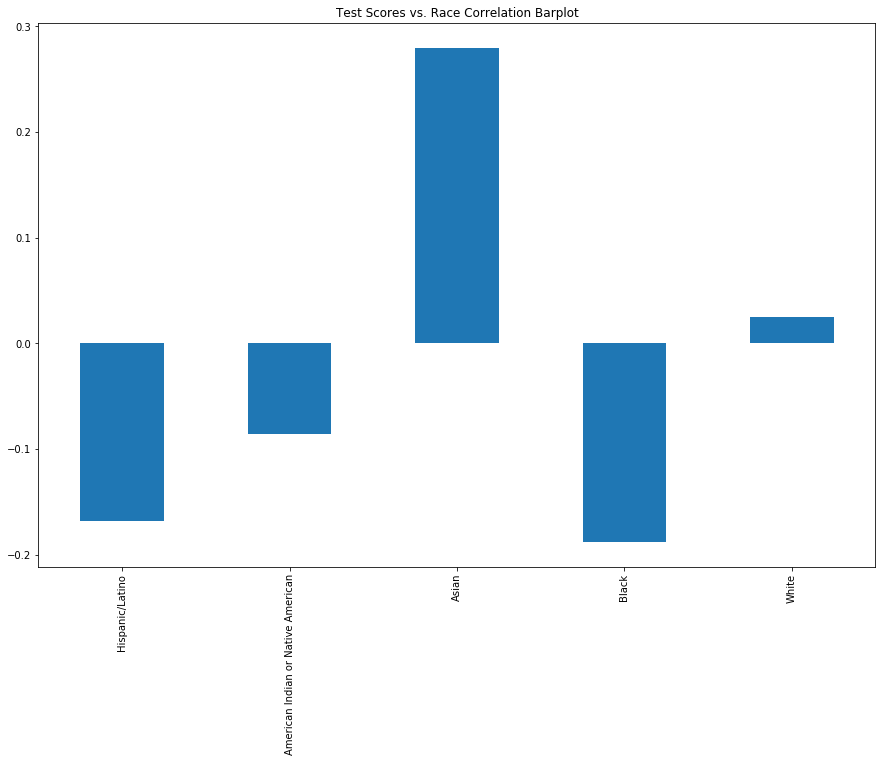

In [176]:
# Hispanic/Latino, American Indian or Native American, Asian, Black, White
race_fields = ['a1_ethh_d', 'a1_ethi_d', 'a1_etha_d', 'a1_ethb_d', 'a1_ethw_d']

xlabels = ['Hispanic/Latino', 'American Indian or Native American', 'Asian', 'Black', 'White']

ax = alg1.corr()['a1_all_rs'][race_fields].plot.bar(figsize=(15,10))
ax.set_xticklabels(xlabels)
plt.title('Test Scores vs. Race Correlation Barplot')

This graph taken from all alg1 scores across Texas shows a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score.